In [1]:
import sys
import os

module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path+"\\src")
    sys.path.append(module_path+"\\References")

In [2]:
import data_manipulation
import data_dictionary  
import data_visualization
import data_preprocessing
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [3]:
pd.set_option('display.max_row', 50)
pd.set_option('display.max_column', 70)

In [4]:
original_data_file_name = 'SEERA dataset original raw data'

In [5]:
original_data = data_manipulation.read_data(original_data_file_name, header = 1)
original_data

,ProjID,Year of project,Organization id,Organization type,Role in organization,Size of organization,Size of IT department,Customer organization type,Estimated duration,Actual duration,% project gain (loss),Development type,Application domain,Object points,Other sizing method,Estimated size,Estimated effort,Actual effort,Contract maturity,Government policy impact,Economic instability impact,Organization management structure clarity,Developer hiring policy,Developer incentives policy,Developer training,Development team management,Top management support,Top management opinion of previous system,Clarity of manual system,User resistance,User computer experience,Users stability,Requirment stability,Requirements flexibility,Project manager experience,...,Analysts capability,Team selection,Team size,Dedicated team members,Daily working hours,Team contracts,Team continuity,Team cohesion,Income satisfaction,Schedule quality,Development environment adequacy,Tool availability,Methodology,Multiple programing languages,Programming language used,DBMS used,Technical stability,Open source software,Level of outsourcing,Outsourcing impact,Degree of software reuse,Degree of risk management,Use of standards,Degree of standards usage,Process reengineering,Requirement accuracy level,Technical documentation,Comments within the code,User manual,Required reusability,Performance requirements,Product complexity,Security requirements,Reliability requirements,Specified H/W
0,1,2015,1,1,1,16,7,13,2.0,3.0,?,1,7,100,2,NaN,2112,3168.0,8,4,1,2,1,8,3,4,4,1,2,1.75,2,1.888889,2.587302,4.555556,2,...,1,3,6,6,8,1,16.6667,2,3,2,1,7,2,1,1,1,1,1,3,NaN,5,3,3,NaN,1.88889,?,1,3,1,1,1,2,2,3,1
1,2,2016,25,5,1,2,1,2,2.0,3.0,?,1,3,19,2,NaN,1056,1584.0,4,4,3,1,2,6,3,7,4,1,4,2.50,2,1.888889,2.904762,4.555556,1,...,2,3,3,3,8,1,0,6,4,2,1,8,1,2,5,1,1,1,3,NaN,5,3,3,NaN,4.55556,2,2,2,1,4,1,1,4,2,1
2,3,2008,2,5,3,2,2,3,3.0,5.0,0,1,3,64,3,50.0,3168,5280.0,4,5,2,3,4,6,3,6,1,0,6,2.00,2,1.888889,1.000000,1.888889,2,...,2,2,6,6,8,1,0,5,2,1,1,8,3,1,3,1,1,0,3,NaN,5,2,3,NaN,1.44444,3,2,2,2,3,4,3,5,2,3
3,4,2009,42,4,2,3,2,4,6.0,6.0,-0.166667,1,7,246,5,70.0,5280,5280.0,2,4,1,1,1,4,3,6,4,1,3,3.25,2,5.000000,2.507937,1.000000,1,...,4,2,6,4,8,2,0,1,2,1,1,4,2,1,4,2,2,0,1,1,3,1,2,6,1.44444,1,1,3,4,3,2,4,3,4,2
4,5,2016,42,4,2,3,2,4,12.0,24.0,-0.174444,1,7,420,5,120.0,19008,38016.0,3,4,3,1,2,3,3,2,4,1,3,2.75,2,1.888889,4.650794,1.000000,1,...,4,3,9,9,8,1,44.4444,2,3,1,1,4,2,3,24,2,1,0,3,NaN,3,1,3,NaN,1,1,1,3,4,3,4,3,3,4,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
115,116,2018,38,1,2,16,1,13,2.0,3.0,?,4,7,65,2,NaN,528,792.0,6,3,1,1,1,7,2,2,3,0,6,3.25,3,4.555556,2.746032,1.000000,1,...,1,2,2,1,8,1,0,1,1,4,2,8,2,1,1,1,1,1,2,2,5,2,3,NaN,1.44444,4,1,1,4,3,2,1,2,3,2
116,117,1998,4,4,1,3,3,3,6.0,18.0,0,1,1,50,2,NaN,7128,21384.0,6,5,7,?,4,5,2,5,4,0,4,2.25,1,4.555556,1.000000,1.444444,3,...,2,3,5,4,12,2,20,6,3,3,4,8,1,1,7,2,2,0,3,NaN,4,3,3,NaN,4.11111,?,1,1,1,4,1,1,1,1,2
117,118,2006,14,2,2,16,6,13,2.0,5.0,?,1,5,11,2,NaN,352,880.0,8,4,1,1,1,8,1,2,2,1,4,1.75,1,1.888889,3.936508,1.444444,1,...,2,3,2,0,8,1,0,2,4,3,1,8,1,1,7,2,1,0,3,NaN,5,3,3,NaN,1.44444,1,4,3,4,4,1,1,2,1,1
118,119,2016,43,6,1,16,11,13,3.0,12.0,?,2,7,67,2,NaN,792,3168.0,6,4,2,1,1,7,3,2,4,1,6,2.25,2,1.888889,2.746032,4.111111,1,...,1,3,2,1,8,1,0,3,4,1,1,8,3,1,1,2,1,0,3,NaN,3,3,3,NaN,1.44444,1,1,3,1,1,2,1,2,3,2


In [6]:
data = original_data.copy()

In [7]:
data = data.set_index('ProjID')
data = data.drop('Organization id', axis = 1)
data

,Year of project,Organization type,Role in organization,Size of organization,Size of IT department,Customer organization type,Estimated duration,Actual duration,% project gain (loss),Development type,Application domain,Object points,Other sizing method,Estimated size,Estimated effort,Actual effort,Contract maturity,Government policy impact,Economic instability impact,Organization management structure clarity,Developer hiring policy,Developer incentives policy,Developer training,Development team management,Top management support,Top management opinion of previous system,Clarity of manual system,User resistance,User computer experience,Users stability,Requirment stability,Requirements flexibility,Project manager experience,Consultant availability,DBMS expert availability,...,Analysts capability,Team selection,Team size,Dedicated team members,Daily working hours,Team contracts,Team continuity,Team cohesion,Income satisfaction,Schedule quality,Development environment adequacy,Tool availability,Methodology,Multiple programing languages,Programming language used,DBMS used,Technical stability,Open source software,Level of outsourcing,Outsourcing impact,Degree of software reuse,Degree of risk management,Use of standards,Degree of standards usage,Process reengineering,Requirement accuracy level,Technical documentation,Comments within the code,User manual,Required reusability,Performance requirements,Product complexity,Security requirements,Reliability requirements,Specified H/W
ProjID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,2015,1,1,16,7,13,2.0,3.0,?,1,7,100,2,NaN,2112,3168.0,8,4,1,2,1,8,3,4,4,1,2,1.75,2,1.888889,2.587302,4.555556,2,3,0,...,1,3,6,6,8,1,16.6667,2,3,2,1,7,2,1,1,1,1,1,3,NaN,5,3,3,NaN,1.88889,?,1,3,1,1,1,2,2,3,1
2,2016,5,1,2,1,2,2.0,3.0,?,1,3,19,2,NaN,1056,1584.0,4,4,3,1,2,6,3,7,4,1,4,2.50,2,1.888889,2.904762,4.555556,1,3,0,...,2,3,3,3,8,1,0,6,4,2,1,8,1,2,5,1,1,1,3,NaN,5,3,3,NaN,4.55556,2,2,2,1,4,1,1,4,2,1
3,2008,5,3,2,2,3,3.0,5.0,0,1,3,64,3,50.0,3168,5280.0,4,5,2,3,4,6,3,6,1,0,6,2.00,2,1.888889,1.000000,1.888889,2,2,1,...,2,2,6,6,8,1,0,5,2,1,1,8,3,1,3,1,1,0,3,NaN,5,2,3,NaN,1.44444,3,2,2,2,3,4,3,5,2,3
4,2009,4,2,3,2,4,6.0,6.0,-0.166667,1,7,246,5,70.0,5280,5280.0,2,4,1,1,1,4,3,6,4,1,3,3.25,2,5.000000,2.507937,1.000000,1,1,1,...,4,2,6,4,8,2,0,1,2,1,1,4,2,1,4,2,2,0,1,1,3,1,2,6,1.44444,1,1,3,4,3,2,4,3,4,2
5,2016,4,2,3,2,4,12.0,24.0,-0.174444,1,7,420,5,120.0,19008,38016.0,3,4,3,1,2,3,3,2,4,1,3,2.75,2,1.888889,4.650794,1.000000,1,2,1,...,4,3,9,9,8,1,44.4444,2,3,1,1,4,2,3,24,2,1,0,3,NaN,3,1,3,NaN,1,1,1,3,4,3,4,3,3,4,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
116,2018,1,2,16,1,13,2.0,3.0,?,4,7,65,2,NaN,528,792.0,6,3,1,1,1,7,2,2,3,0,6,3.25,3,4.555556,2.746032,1.000000,1,2,0,...,1,2,2,1,8,1,0,1,1,4,2,8,2,1,1,1,1,1,2,2,5,2,3,NaN,1.44444,4,1,1,4,3,2,1,2,3,2
117,1998,4,1,3,3,3,6.0,18.0,0,1,1,50,2,NaN,7128,21384.0,6,5,7,?,4,5,2,5,4,0,4,2.25,1,4.555556,1.000000,1.444444,3,2,1,...,2,3,5,4,12,2,20,6,3,3,4,8,1,1,7,2,2,0,3,NaN,4,3,3,NaN,4.11111,?,1,1,1,4,1,1,1,1,2
118,2006,2,2,16,6,13,2.0,5.0,?,1,5,11,2,NaN,352,880.0,8,4,1,1,1,8,1,2,2,1,4,1.75,1,1.888889,3.936508,1.444444,1,3,1,...,2,3,2,0,8,1,0,2,4,3,1,8,1,1,7,2,1,0,3,NaN,5,3,3,NaN,1.44444,1,4,3,4,4,1,1,2,1,1


In [14]:
codes = data_dictionary.values_meaning('Team selection')
codes

{1: 'Based on experience in application type',
 2: 'Based on job specialization (analysts, designers, ..., etc.)',
 3: 'Based on existing developers'}

ValueError: 'c' argument must be a color, a sequence of colors, or a sequence of numbers, not ProjID
1      3
2      3
3      2
4      2
5      3
      ..
116    2
117    3
118    3
119    3
120    3
Name: Team selection, Length: 120, dtype: object

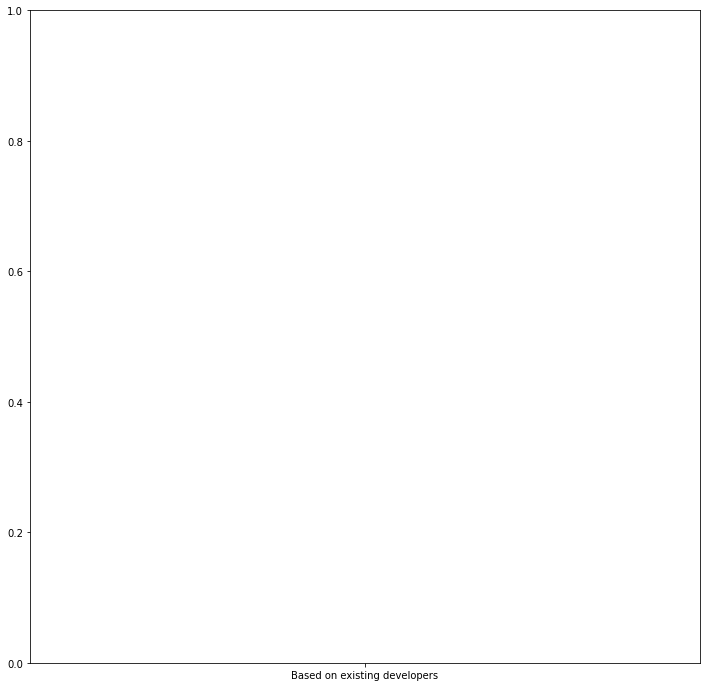

In [15]:
data_visualization.visualize_feature_target(data['Team selection'], data['Actual effort'], values_meaning = codes)

In [12]:
data.describe()

,Year of project,Organization type,Role in organization,Size of organization,Size of IT department,Customer organization type,Estimated duration,Actual duration,Development type,Application domain,Other sizing method,Estimated size,Estimated effort,Actual effort,Contract maturity,Economic instability impact,Top management support,Top management opinion of previous system,User resistance,User computer experience,Users stability,Requirment stability,Requirements flexibility,DBMS expert availability,Team size,Dedicated team members,Daily working hours,Methodology,Multiple programing languages,Programming language used,DBMS used,Open source software
count,120.000000,120.000000,120.00000,120.000000,120.000000,120.000000,120.000000,120.000000,120.000000,120.00000,120.000000,13.000000,120.000000,120.000000,120.000000,120.000000,120.000000,120.000000,120.000000,120.000000,120.000000,120.000000,120.000000,120.000000,120.000000,120.000000,120.000000,120.000000,120.000000,120.000000,120.000000,120.000000
mean,2011.958333,4.550000,1.97500,7.841667,4.366667,7.941667,5.670833,10.375000,1.516667,4.30000,2.241667,13707.846154,5225.183333,9060.929167,4.341667,1.958333,3.675000,0.625000,2.612500,1.575000,3.137037,2.653439,2.548148,0.708333,5.741667,4.266667,8.258333,2.283333,1.191667,7.433333,2.541667,0.341667
std,6.267692,1.358756,1.05689,6.201106,4.134165,4.784948,3.685793,8.903604,0.987173,2.35004,0.819877,44289.853819,6881.106926,12598.482007,1.621784,1.252868,1.131389,0.486153,0.777743,0.617157,1.354082,1.102471,1.367120,0.456435,6.343787,6.446592,1.600923,1.278019,0.472715,4.351631,1.352842,0.476257
min,1993.000000,1.000000,1.00000,1.000000,1.000000,1.000000,0.250000,0.500000,1.000000,1.00000,1.000000,5.000000,176.000000,396.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.888889,1.000000,1.000000,0.000000,1.000000,0.000000,4.000000,1.000000,1.000000,1.000000,1.000000,0.000000
25%,2008.750000,4.000000,1.00000,3.000000,1.000000,3.000000,3.000000,5.000000,1.000000,2.00000,2.000000,7.000000,1278.750000,2112.000000,3.000000,1.000000,4.000000,0.000000,2.000000,1.000000,1.888889,1.634921,1.444444,0.000000,3.000000,1.000000,8.000000,1.000000,1.000000,6.000000,2.000000,0.000000
50%,2014.000000,5.000000,2.00000,4.500000,2.000000,10.000000,5.000000,8.000000,1.000000,5.00000,2.000000,50.000000,2860.000000,4576.000000,4.000000,1.000000,4.000000,1.000000,2.500000,2.000000,1.888889,2.746032,1.888889,1.000000,5.000000,3.000000,8.000000,2.000000,1.000000,7.000000,2.000000,0.000000
75%,2017.000000,5.000000,2.00000,16.000000,8.000000,13.000000,7.000000,12.000000,1.250000,7.00000,2.000000,76.000000,6336.000000,10032.000000,5.000000,3.000000,4.000000,1.000000,3.000000,2.000000,4.555556,3.539683,4.111111,1.000000,6.000000,5.000000,8.000000,3.000000,1.000000,9.000000,3.000000,1.000000
max,2019.000000,8.000000,8.00000,17.000000,12.000000,17.000000,20.000000,48.000000,4.000000,7.00000,5.000000,160236.000000,50688.000000,79200.000000,8.000000,7.000000,5.000000,1.000000,4.750000,3.000000,5.000000,4.809524,5.000000,1.000000,48.000000,48.000000,14.000000,7.000000,3.000000,25.000000,5.000000,1.000000


In [13]:
general_information_columns = ['Role in organization', 'Organization type']

# Data Pre-Processing

## Missing values


In [14]:
#In our project, missing values are represented with a '?', so we have to replace this value with a np.nan
data = data_preprocessing.define_missing_values(data)

In [15]:
"""plt.figure(figsize = (20, 10))
data_visualization.missing_values_map(data)"""

'plt.figure(figsize = (20, 10))\ndata_visualization.missing_values_map(data)'

In [16]:
#These are the missing values rates for each column in our dataset
missing_values_rates = data_visualization.nan_columns_rates(data)
missing_values_rates

Outsourcing impact           0.908333
Estimated size               0.891667
Degree of standards usage    0.825000
% project gain (loss)        0.466667
Team contracts               0.091667
                               ...   
Users stability              0.000000
Requirment stability         0.000000
Requirements flexibility     0.000000
DBMS used                    0.000000
Year of project              0.000000
Length: 74, dtype: float64

In [17]:
#We will drop all columns that have more than 40% missing values, and store the new dataset in a variable
data = data_preprocessing.drop_missing_values_cols(data, 0.4)

In [18]:
data.shape

(120, 70)

In [19]:
rows_rates = data_visualization.nan_rows_rates(data)
rows_rates

ProjID
70     0.400000
33     0.128571
11     0.028571
117    0.028571
51     0.028571
         ...   
83     0.000000
84     0.000000
85     0.000000
86     0.000000
60     0.000000
Length: 120, dtype: float64

In [20]:
data = data_preprocessing.drop_missing_values_rows(data, 0.4)
data.shape

(119, 70)

In [21]:
"""plt.figure(figsize = (20, 10))
data_visualization.missing_values_map(data)"""

'plt.figure(figsize = (20, 10))\ndata_visualization.missing_values_map(data)'

In [22]:
data.columns

Index(['Year of project', 'Organization type', 'Role in organization',
       'Size of organization', 'Size of IT department',
       'Customer organization type', 'Estimated  duration', 'Actual duration',
       'Development type', 'Application domain', 'Object points',
       'Other sizing method', 'Estimated effort', 'Actual effort',
       'Contract maturity', 'Government policy impact',
       'Economic instability impact',
       'Organization management structure clarity', 'Developer hiring policy',
       'Developer incentives policy ', 'Developer training',
       'Development team management', 'Top management support',
       'Top management opinion of previous system', 'Clarity of manual system',
       'User resistance', 'User computer experience', 'Users stability',
       'Requirment stability', 'Requirements flexibility',
       'Project manager experience', 'Consultant availability',
       'DBMS  expert availability', 'Precedentedness',
       'Software tool experience

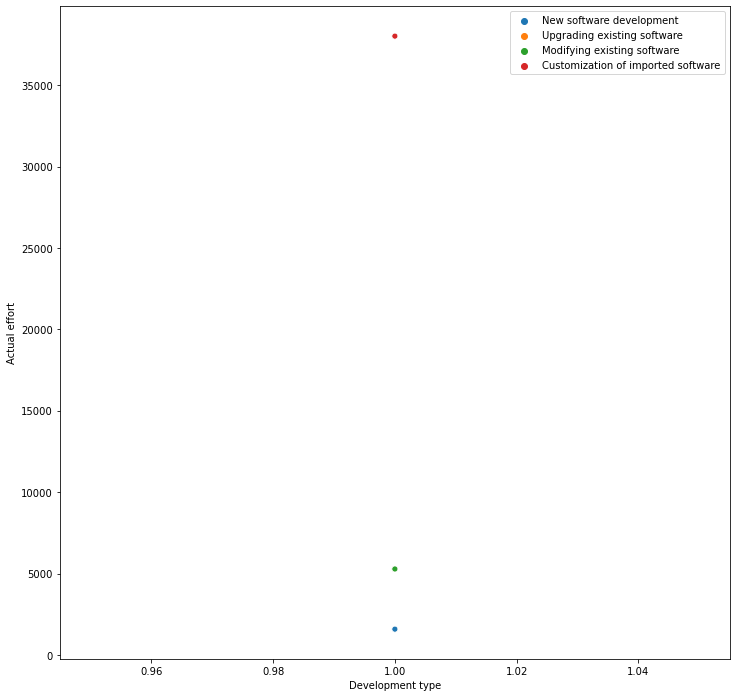

In [23]:
data_visualization.visualize_feature_target('Development type', 'Actual effort', original_data)

{1: 'New software development',
 2: 'Upgrading existing software',
 3: 'Modifying existing software',
 4: 'Customization of imported software'}

In [12]:
original_data['Development type'].name

'Development type'

C:\Users\User\anaconda3\lib\site-packages\pandas\core\ops\array_ops.py:253: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  res_values = method(rvalues)


ValueError: The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().